In [30]:
import pandas as pd
import numpy as np
from utils import get_species, get_labels, get_labels_all

In [31]:
X, y, y_all = get_species(), get_labels(), get_labels_all()

In [32]:
X = X[list(filter(lambda x : "Virus" not in x and "virus" not in x and "unclassified" not in x, X.columns))]

In [33]:
cols = ((X > 0.00001).mean(axis=0) > 0.01).values
X = X.iloc[:, cols]

In [34]:
weights = ((y_all == "Obesity") | (y_all == "Overweight") | (y_all == "Underweight")).values
X, y, y_all = X.iloc[~weights, :], y.iloc[~weights, :], y_all.iloc[~weights, :]

In [35]:
studies = np.unique(X.index.get_level_values(0))

In [36]:
np.random.seed(42)
perm = np.random.permutation(len(studies))
prop = 0.9
train_idx, test_idx = perm[:int(len(studies) * prop)], perm[int(len(studies) * prop):]
train_studies = studies[train_idx]
test_studies = studies[test_idx]

In [51]:
c = 0.00001
X_train, y_train = (X.loc[train_studies], y.loc[train_studies])
X_test, y_test = X.loc[test_studies], y.loc[test_studies]

In [52]:
X_train.shape, X_test.shape, y_train.shape

((9011, 413), (1028, 413), (9011, 1))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

clf = LogisticRegression(random_state=42, penalty="l1", solver="liblinear", C=1, class_weight="balanced")
clf.fit(X_train > c, y_train)
y_hat = clf.predict(X_test > c)
balanced_accuracy_score(y_test, y_hat)

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6509337732247948

In [57]:
from skbio.tree import TreeNode
otu_ids=X.columns
lineages = dict([(otu, ["root"] + otu.split("|")) for i, otu in enumerate(otu_ids[:])])
tree = TreeNode.from_taxonomy(lineages.items())

In [58]:
for t in tree.postorder():
    t.length = 1

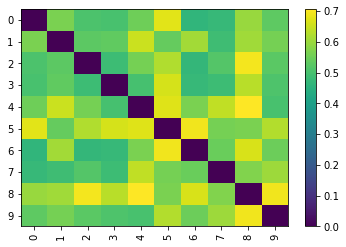

In [59]:
from skbio.diversity import beta_diversity

beta_diversity("unweighted_unifrac", X.iloc[:10, :] > c, validate=True, otu_ids=otu_ids, tree=tree)

In [109]:
healthy_train = X_train.iloc[y_train.values, :]
healthy_train

k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
P48      SAMD00164840                                               0.000000                                                                                                 
         SAMD00165015                                               0.000000                                                                                                 
         SAMD00114898                                               0.000687                                                                                                 
         SAMD00164824                                               0.000000                                                                                                 
         SAMD00164873                                               0.000000                                                                                                 
...                                                                      ...                                                                                                 
GMHI-24  SAMEA2579925                                               0.000000                                                                                                 
         SAMEA2579923                                               0.002536                                                                                                 
         SAMEA2579916                                               0.000000                                                                                                 
         SAMEA2579914                                               0.000000                                                                                                 
         SAMEA2579909                                               0.000388                                                                                                 

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae  \
Study_ID Sample Accession                                                                                                                                               
P48      SAMD00164840                                                    0.0                                                                                            
         SAMD00165015                                                    0.0                                                                                            
         SAMD00114898                                                    0.0                                                                                            
         SAMD00164824                                                    0.0                                                                                            
         SAMD00164873                                                    0.0                                                                                            
...                                                                      ...                                                                                            
GMHI-24  SAMEA2579925                                                    0.0                                                                                            
         SAMEA2579923                                                    0.0                                                                                            
         SAMEA2579916                                                    0

In [110]:
test = X_test
test

k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-4   SAMN00792017                                               0.000000                                                                                                 
         SAMN00792016                                               0.004712                                                                                                 
         SAMN00792015                                               0.000000                                                                                                 
         SAMN00792014                                               0.010887                                                                                                 
         SAMN00792013                                               0.000000                                                                                                 
...                                                                      ...                                                                                                 
P63      SAMN12231064                                               0.011980                                                                                                 
         SAMN12231067                                               0.015229                                                                                                 
         SAMN12231063                                               0.000478                                                                                                 
         SAMN12231073                                               0.000000                                                                                                 
         SAMN12231072                                               0.000869                                                                                                 

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae  \
Study_ID Sample Accession                                                                                                                                               
GMHI-4   SAMN00792017                                               0.000000                                                                                            
         SAMN00792016                                               0.000072                                                                                            
         SAMN00792015                                               0.000000                                                                                            
         SAMN00792014                                               0.000000                                                                                            
         SAMN00792013                                               0.000000                                                                                            
...                                                                      ...                                                                                            
P63      SAMN12231064                                               0.000000                                                                                            
         SAMN12231067                                               0.000000                                                                                            
         SAMN12231063                                               0.0000

In [111]:
healthy_ids = list(healthy_train.index.get_level_values(1))
test_ids = list(test.index.get_level_values(1))
ids = healthy_ids + test_ids

In [112]:
id_pairs = [(t, h) for h in healthy_ids for t in test_ids]

In [113]:
from skbio.diversity import partial_beta_diversity

healthy_distances = partial_beta_diversity("unweighted_unifrac", X > c, ids, id_pairs, validate=False, otu_ids=otu_ids, tree=tree)

In [114]:
healthy_distances.shape

(7002, 7002)

In [121]:
test_dists = healthy_distances[len(healthy_ids):, :]

In [124]:
td = test_dists.sum(axis=1) / len(healthy_ids)

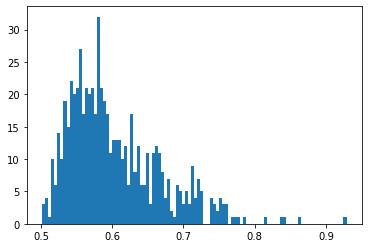

0.6031323042161608

In [134]:
import matplotlib.pyplot as plt

plt.hist(td[y_test.values.flatten()], bins=100)
plt.show()
np.mean(td[y_test.values.flatten()])

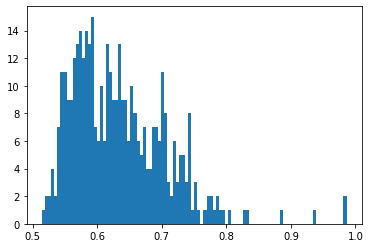

0.6331395195784189

In [135]:
plt.hist(td[~y_test.values.flatten()], bins=100)
plt.show()
np.mean(td[~y_test.values.flatten()])

In [127]:
unhealthy_train = X_train.iloc[~y_train.values, :]

In [128]:
unhealthy_ids = list(unhealthy_train.index.get_level_values(1))
test_ids = list(test.index.get_level_values(1))
ids = unhealthy_ids + test_ids

In [129]:
id_pairs = [(t, h) for h in unhealthy_ids for t in test_ids]

In [130]:
from skbio.diversity import partial_beta_diversity

unhealthy_distances = partial_beta_diversity("unweighted_unifrac", X > c, ids, id_pairs, validate=False, otu_ids=otu_ids, tree=tree)

In [131]:
test_dists = unhealthy_distances[len(unhealthy_ids):, :]

In [132]:
td2 = test_dists.sum(axis=1) / len(unhealthy_ids)

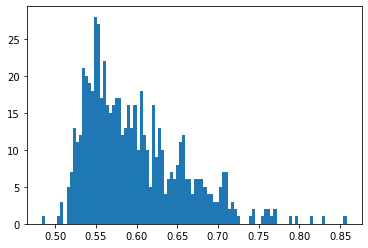

0.5973390471663432

In [133]:
plt.hist(td2[y_test.values.flatten()], bins=100)
plt.show()
np.mean(td2[y_test.values.flatten()])

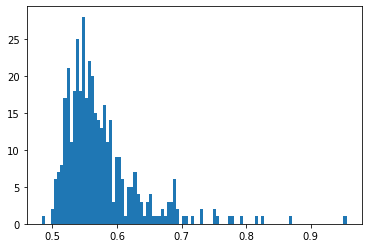

0.5746464213562757

In [137]:
plt.hist(td2[~y_test.values.flatten()], bins=100)
plt.show()
np.mean(td2[~y_test.values.flatten()])

In [147]:
predictions = (td < td2)

In [150]:
predictions

array([False,  True, False, ..., False, False, False])

In [148]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

balanced_accuracy_score(y_test, predictions), accuracy_score(y_test, predictions)

(0.6309195086284869, 0.5982490272373541)

In [151]:
td0 = td2 - td

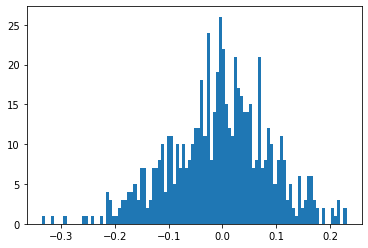

In [154]:
plt.hist(td0[y_test.values.flatten()], bins=100)
plt.show()

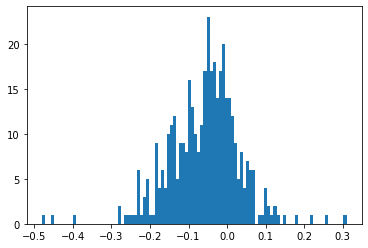

In [155]:
plt.hist(td0[~y_test.values.flatten()], bins=100)
plt.show()